# Importing modules

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Loading datset

In [55]:
df = pd.read_csv(r"C:\Users\ajayk\Desktop\Machine Learning\Condition_Monitoring_of_Hydraulic_System.csv")

In [56]:
df

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
0,0,160.673492,109.466914,1.991475,9.842170,9.728098,6.709815,35.621983,40.978767,38.471017,31.745250,39.601350,1.862750,59.157183,3,100,0,130,1
1,1,160.603320,109.354890,1.976234,9.635142,9.529488,6.715315,36.676967,41.532767,38.978967,34.493867,25.786433,1.255550,59.335617,3,100,0,130,1
2,2,160.347720,109.158845,1.972224,9.530548,9.427949,6.718522,37.880800,42.442450,39.631950,35.646150,22.218233,1.113217,59.543150,3,100,0,130,1
3,3,160.188088,109.064807,1.946575,9.438827,9.337430,6.720565,38.879050,43.403983,40.403383,36.579467,20.459817,1.062150,59.794900,3,100,0,130,1
4,4,160.000472,108.931434,1.922707,9.358762,9.260636,6.690308,39.803917,44.332750,41.310550,37.427900,19.787017,1.070467,59.455267,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,161.227572,109.779581,2.001438,9.972037,9.850361,6.689930,35.313783,40.874800,38.269267,30.404733,46.628517,2.160600,59.033100,100,100,0,90,0
2201,2201,161.206070,109.787481,1.998781,9.966184,9.844854,6.692182,35.321600,40.868883,38.268250,30.416233,46.689817,2.151450,59.068000,100,100,0,90,0
2202,2202,161.192120,109.756174,1.993436,9.964329,9.842628,6.693277,35.319183,40.875950,38.246367,30.426250,46.472300,2.143300,59.132350,100,100,0,90,0
2203,2203,161.208917,109.793884,2.007077,9.968232,9.846690,6.684128,35.324767,40.876067,38.245733,30.414283,46.544967,2.148483,58.970800,100,100,0,90,0


In [57]:
df.columns

Index(['Unnamed: 0', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'FS1', 'TS1', 'TS2',
       'TS3', 'TS4', 'CE', 'CP', 'SE', 'y_coolerCondition', 'y_valveCondition',
       'y_pumpLeak', 'y_hydraulicAcc', 'y_stableFlag'],
      dtype='object')

In [58]:
df.head()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
0,0,160.673492,109.466914,1.991475,9.842170,9.728098,6.709815,35.621983,40.978767,38.471017,31.745250,39.601350,1.862750,59.157183,3,100,0,130,1
1,1,160.603320,109.354890,1.976234,9.635142,9.529488,6.715315,36.676967,41.532767,38.978967,34.493867,25.786433,1.255550,59.335617,3,100,0,130,1
2,2,160.347720,109.158845,1.972224,9.530548,9.427949,6.718522,37.880800,42.442450,39.631950,35.646150,22.218233,1.113217,59.543150,3,100,0,130,1
3,3,160.188088,109.064807,1.946575,9.438827,9.337430,6.720565,38.879050,43.403983,40.403383,36.579467,20.459817,1.062150,59.794900,3,100,0,130,1
4,4,160.000472,108.931434,1.922707,9.358762,9.260636,6.690308,39.803917,44.332750,41.310550,37.427900,19.787017,1.070467,59.455267,3,100,0,130,1


In [59]:
df.tail()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
2200,2200,161.227572,109.779581,2.001438,9.972037,9.850361,6.689930,35.313783,40.874800,38.269267,30.404733,46.628517,2.160600,59.03310,100,100,0,90,0
2201,2201,161.206070,109.787481,1.998781,9.966184,9.844854,6.692182,35.321600,40.868883,38.268250,30.416233,46.689817,2.151450,59.06800,100,100,0,90,0
2202,2202,161.192120,109.756174,1.993436,9.964329,9.842628,6.693277,35.319183,40.875950,38.246367,30.426250,46.472300,2.143300,59.13235,100,100,0,90,0
2203,2203,161.208917,109.793884,2.007077,9.968232,9.846690,6.684128,35.324767,40.876067,38.245733,30.414283,46.544967,2.148483,58.97080,100,100,0,90,0
2204,2204,161.217128,109.792177,2.002690,9.973638,9.851949,6.692302,35.322233,40.859400,38.248917,30.390800,46.647933,2.157050,59.05390,100,100,0,90,0


In [60]:
df.describe()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,160.485315,109.379906,1.753227,9.163320,9.079363,6.198549,45.424567,50.365979,47.662121,40.735654,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,636.672993,4.699425,4.986585,0.251902,0.576296,0.549589,1.032883,7.991933,7.396254,7.451888,8.107878,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,0.000000,155.391547,104.406307,0.840252,8.365800,8.321527,2.018572,35.313783,40.859400,38.245733,30.390800,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,551.000000,158.100195,106.962382,1.729733,8.547239,8.487167,6.391670,36.237150,41.864183,39.123183,31.272567,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,1102.000000,158.960895,107.730169,1.779631,9.115781,9.031516,6.576673,44.836650,49.780583,47.070250,40.429050,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,1653.000000,161.000735,109.421612,1.932047,9.844351,9.729275,6.657508,54.104317,58.584467,55.694433,49.409500,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,2204.000000,180.922708,131.589089,2.023398,9.978510,9.856591,6.722707,57.899283,61.958467,59.423167,53.060417,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


# Assigning values to X and y 

In [61]:
X = df[['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'FS1', 'TS1', 'TS2', 'TS3', 'TS4', 'CE', 'CP', 'SE']]
y = df[['y_coolerCondition', 'y_valveCondition', 'y_pumpLeak', 'y_hydraulicAcc']]

In [62]:
X

,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE
0,160.673492,109.466914,1.991475,9.842170,9.728098,6.709815,35.621983,40.978767,38.471017,31.745250,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,9.635142,9.529488,6.715315,36.676967,41.532767,38.978967,34.493867,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,9.530548,9.427949,6.718522,37.880800,42.442450,39.631950,35.646150,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946575,9.438827,9.337430,6.720565,38.879050,43.403983,40.403383,36.579467,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,9.358762,9.260636,6.690308,39.803917,44.332750,41.310550,37.427900,19.787017,1.070467,59.455267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.227572,109.779581,2.001438,9.972037,9.850361,6.689930,35.313783,40.874800,38.269267,30.404733,46.628517,2.160600,59.033100
2201,161.206070,109.787481,1.998781,9.966184,9.844854,6.692182,35.321600,40.868883,38.268250,30.416233,46.689817,2.151450,59.068000
2202,161.192120,109.756174,1.993436,9.964329,9.842628,6.693277,35.319183,40.875950,38.246367,30.426250,46.472300,2.143300,59.132350
2203,161.208917,109.793884,2.007077,9.968232,9.846690,6.684128,35.324767,40.876067,38.245733,30.414283,46.544967,2.148483,58.970800


In [63]:
y

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc
0,3,100,0,130
1,3,100,0,130
2,3,100,0,130
3,3,100,0,130
4,3,100,0,130
...,...,...,...,...
2200,100,100,0,90
2201,100,100,0,90
2202,100,100,0,90
2203,100,100,0,90


# Splitting dataset to train and test

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [65]:
X_train

,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE
572,156.259090,105.109720,1.686528,8.409337,8.359900,6.572717,57.330050,61.493300,58.674333,52.562750,18.882850,1.471883,59.950200
117,157.029422,106.361600,1.729071,8.592279,8.533665,6.601323,53.610750,58.093367,55.153417,49.000933,20.267500,1.531833,60.262533
1161,159.114915,107.267203,1.803048,9.136608,9.051796,6.632630,44.593617,49.634633,46.804117,40.021017,27.786933,1.770233,58.852000
789,158.176940,107.214707,1.786352,8.970626,8.898110,6.634915,47.109183,52.262500,49.325900,42.666800,26.399917,1.724267,59.569083
1322,158.989445,107.983810,1.806357,9.146062,9.061882,6.672445,44.389533,49.417183,46.637700,39.878583,27.348517,1.772367,59.857767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,158.867803,107.103200,1.789223,9.054415,8.976108,6.643458,45.757833,50.665533,47.919200,41.195717,28.058167,1.751483,58.991450
1731,160.771032,109.054252,1.935512,9.880726,9.761596,6.500505,35.897400,41.499200,38.796267,30.888767,47.345067,2.168317,56.692333
763,157.909970,106.973936,1.779226,8.924975,8.852112,6.626108,47.881850,53.009617,50.051850,43.319533,26.283400,1.731600,59.623317
835,158.262197,107.266625,1.803428,8.985091,8.909845,6.636710,46.754067,51.858083,48.984550,42.363117,26.282333,1.713750,59.742533


In [66]:
y_train

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc
572,3,80,0,100
117,3,100,0,130
1161,20,73,0,115
789,20,100,0,90
1322,20,100,0,100
...,...,...,...,...
1033,20,73,0,130
1731,100,80,1,130
763,20,100,0,90
835,20,100,0,90


In [67]:
X_test

,PS1,PS2,PS3,PS4,PS5,FS1,TS1,TS2,TS3,TS4,CE,CP,SE
1747,160.647718,109.422139,1.957377,9.879644,9.761711,6.533342,35.973683,41.559483,38.836933,30.975850,47.250267,2.156450,57.367050
200,156.928997,106.243144,1.725192,8.535125,8.478645,6.603242,54.242117,58.860383,55.801950,49.493383,20.107950,1.563267,60.555183
333,156.821348,106.100606,1.768057,8.509735,8.452485,6.616405,54.491600,59.252683,56.180117,49.713783,20.352883,1.599183,60.126250
2042,161.098415,109.227591,1.991564,9.842049,9.726338,6.686235,36.231633,41.849533,39.087083,31.142117,47.313050,2.170017,58.795683
206,156.975997,106.274665,1.752760,8.532493,8.477292,6.586313,54.300150,58.905800,55.849017,49.567633,20.062617,1.556367,60.231650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,172.765863,122.665902,1.068509,8.431605,8.384973,3.267127,56.517917,59.900417,58.260017,52.129050,19.069567,1.484767,29.870200
1175,158.994632,107.480166,1.801477,9.138057,9.056158,6.664957,44.609317,49.681483,46.934667,40.080350,27.829333,1.792283,59.395700
286,156.404905,105.853168,1.690030,8.515130,8.455835,6.350280,54.441917,58.980533,55.894583,49.684133,20.106000,1.537683,57.651133
2010,160.601713,109.158295,1.929946,9.839934,9.725174,6.515223,36.262450,41.859250,39.128017,31.282217,46.917233,2.147017,57.128517


In [68]:
y_test

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc
1747,100,100,1,130
200,3,100,0,130
333,3,100,0,115
2042,100,80,0,100
206,3,100,0,130
...,...,...,...,...
488,3,80,2,100
1175,20,80,0,115
286,3,100,1,130
2010,100,90,1,100


# Create a base decision tree classifier and bagging classifier

In [69]:
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_cooler = OneVsRestClassifier(BaggingClassifier(base_classifier, n_estimators=10, random_state=42))
bagging_valve = OneVsRestClassifier(BaggingClassifier(base_classifier, n_estimators=10, random_state=42))
bagging_pump = OneVsRestClassifier(BaggingClassifier(base_classifier, n_estimators=10, random_state=42))
bagging_hydraulic = OneVsRestClassifier(BaggingClassifier(base_classifier, n_estimators=10, random_state=42))

# Fit each classifier on the corresponding target variable

In [70]:
bagging_cooler.fit(X_train[['CE', 'CP', 'PS4', 'PS5', 'TS1', 'TS2', 'TS3', 'TS4']], y_train['y_coolerCondition'])
bagging_valve.fit(X_train[['PS2', 'PS3']], y_train['y_valveCondition'])
bagging_pump.fit(X_train[['FS1', 'SE', 'PS1']], y_train['y_pumpLeak'])
bagging_hydraulic.fit(X_train[['PS1', 'PS2', 'PS3', 'SE', 'FS1', 'TS2']], y_train['y_hydraulicAcc'])

OneVsRestClassifier(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                random_state=42))

# Make predictions on the test data for each classifier

In [71]:
y_pred_cooler = bagging_cooler.predict(X_test[['CE', 'CP', 'PS4', 'PS5', 'TS1', 'TS2', 'TS3', 'TS4']])
y_pred_valve = bagging_valve.predict(X_test[['PS2', 'PS3']])
y_pred_pump = bagging_pump.predict(X_test[['FS1', 'SE', 'PS1']])
y_pred_hydraulic = bagging_hydraulic.predict(X_test[['PS1', 'PS2', 'PS3', 'SE', 'FS1', 'TS2']])

y_pred_prob_cooler = bagging_cooler.predict_proba(X_test[['CE', 'CP', 'PS4', 'PS5', 'TS1', 'TS2', 'TS3', 'TS4']])
y_pred_prob_valve = bagging_valve.predict_proba(X_test[['PS2', 'PS3']])
y_pred_prob_pump = bagging_pump.predict_proba(X_test[['FS1', 'SE', 'PS1']])
y_pred_prob_hydraulic = bagging_hydraulic.predict_proba(X_test[['PS1', 'PS2', 'PS3', 'SE', 'FS1', 'TS2']])

# Evaluate the performance for each classifier

In [73]:
accuracy_cooler = accuracy_score(y_test['y_coolerCondition'], y_pred_cooler)
accuracy_valve = accuracy_score(y_test['y_valveCondition'], y_pred_valve)
accuracy_pump = accuracy_score(y_test['y_pumpLeak'], y_pred_pump)
accuracy_hydraulic = accuracy_score(y_test['y_hydraulicAcc'], y_pred_hydraulic)

# Print results

In [74]:
print("Accuracy - Cooler Condition:",accuracy_cooler)
print("Accuracy - Valve Condition:",accuracy_valve)
print("Accuracy - Pump Leak:",accuracy_pump)
print("Accuracy - Hydraulic Acc:",accuracy_hydraulic)

Accuracy - Cooler Condition: 0.9977324263038548
Accuracy - Valve Condition: 0.7913832199546486
Accuracy - Pump Leak: 0.9863945578231292
Accuracy - Hydraulic Acc: 0.9501133786848073


# Generate classification reports and confusion matrices

In [75]:
report_cooler = classification_report(y_test['y_coolerCondition'], y_pred_cooler)
matrix_cooler = confusion_matrix(y_test['y_coolerCondition'], y_pred_cooler)

report_valve = classification_report(y_test['y_valveCondition'], y_pred_valve)
matrix_valve = confusion_matrix(y_test['y_valveCondition'], y_pred_valve)

report_pump = classification_report(y_test['y_pumpLeak'], y_pred_pump)
matrix_pump = confusion_matrix(y_test['y_pumpLeak'], y_pred_pump)

report_hydraulic = classification_report(y_test['y_hydraulicAcc'], y_pred_hydraulic)
matrix_hydraulic = confusion_matrix(y_test['y_hydraulicAcc'], y_pred_hydraulic)

# Print classification reports and confusion matrices

In [76]:
print("Classification Report - Cooler Condition:")
print(report_cooler)
print("Confusion Matrix - Cooler Condition:")
print(matrix_cooler)
print("\n")

print("Classification Report - Valve Condition:")
print(report_valve)
print("Confusion Matrix - Valve Condition:")
print(matrix_valve)
print("\n")

print("Classification Report - Pump Leak:")
print(report_pump)
print("Confusion Matrix - Pump Leak:")
print(matrix_pump)
print("\n")

print("Classification Report - Hydraulic Acc:")
print(report_hydraulic)
print("Confusion Matrix - Hydraulic Acc:")
print(matrix_hydraulic)
print("\n")

Classification Report - Cooler Condition:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       156
          20       0.99      1.00      1.00       145
         100       1.00      0.99      1.00       140

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Confusion Matrix - Cooler Condition:
[[156   0   0]
 [  0 145   0]
 [  0   1 139]]


Classification Report - Valve Condition:
              precision    recall  f1-score   support

          73       0.82      0.76      0.79        70
          80       0.69      0.74      0.72        73
          90       0.67      0.61      0.64        72
         100       0.85      0.88      0.86       226

    accuracy                           0.79       441
   macro avg       0.76      0.75      0.75       441
weighted avg       0.79      0.79      0.79       441

Confusion Matrix

# Function to plot confusion matrix as heatmap

In [77]:
def plot_confusion_matrix_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices as heatmaps

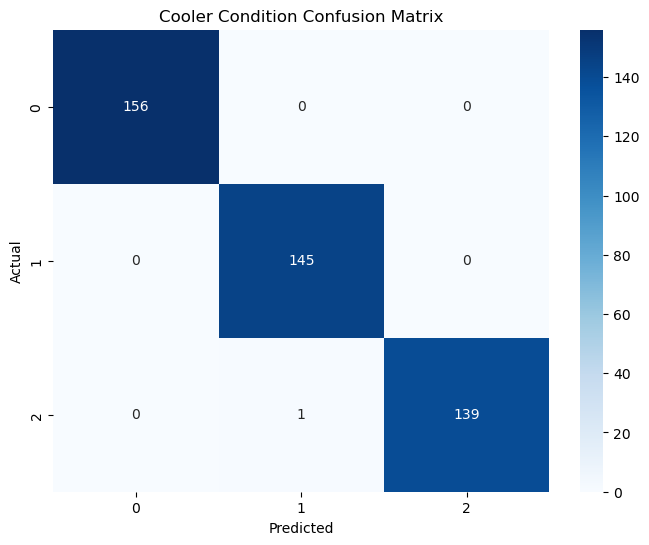

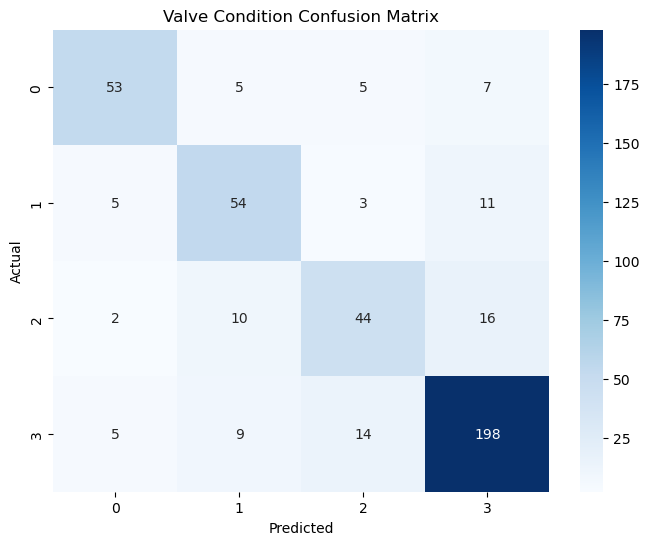

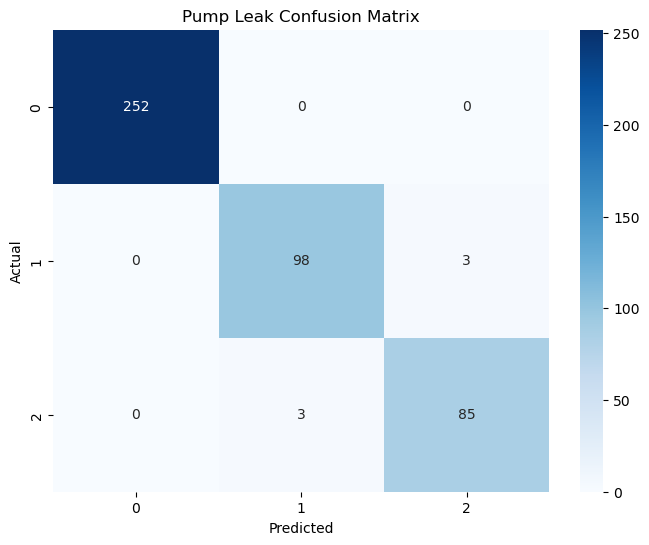

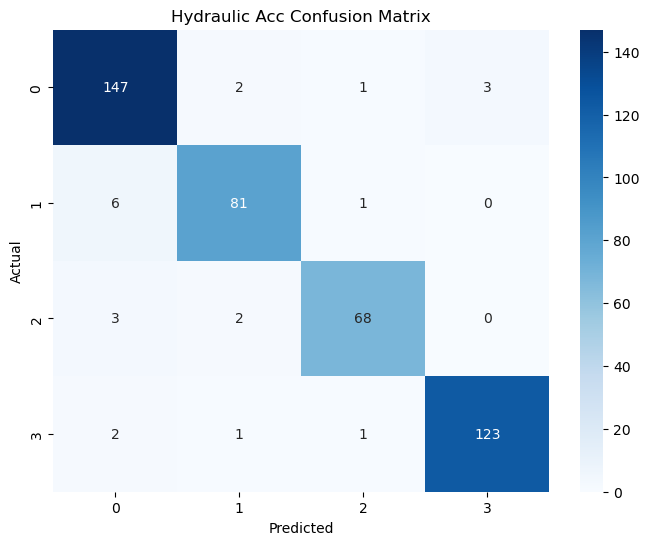

In [78]:
plot_confusion_matrix_heatmap(matrix_cooler, title='Cooler Condition Confusion Matrix')
plot_confusion_matrix_heatmap(matrix_valve, title='Valve Condition Confusion Matrix')
plot_confusion_matrix_heatmap(matrix_pump, title='Pump Leak Confusion Matrix')
plot_confusion_matrix_heatmap(matrix_hydraulic, title='Hydraulic Acc Confusion Matrix')